# <center>Supply Chain & Logistics</center>

In this notebook we are going to analyze a dataset related to Supply Chain and Logistics. Our dataset contains the following features:

1. **shipment_ID**:  _A unique shipment ID given to each order._
2. **send_timestamp**:  _The date/time when the order was sent._
3. **pick_up_point**:  _The pick-up point of the order._
4. **drop_off_point**:  _The drop-off point of the order._
5. **source_country**:  _Country from where the goods need to be shipped._
6. **destination_country**:  _Country where the goods need to be shipped to._
7. **freight_cost**:  _Cost of transportation per Kg._
8. **gross_weight**:  _Gross weight in Kg._
9. **shipment_charges**:  _The fixed cost per shipment._
10. **shipment_mode**:  _Whether shipped by Air or Ocean._
11. **shipping_company**:  _The candidate company to make the shipping._
12. **selected**:  _Whether the candidate company was selected or not._
13. **shipping_time**:  _The time taken for the goods to reach the destination._

## 1. Data Collection

In [215]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
#loading our data
data = pd.read_csv("Datasets/shipping.csv")
data.head(10)

,Unnamed: 0,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected,shipping_time
0,0,S000720,2019-06-08 07:17:51,A,Y,GB,IN,88.61,355.0,0.75,Air,SC3,Y,5.00741
1,1,S000725,2019-07-12 15:23:21,A,Y,GB,IN,85.65,105.0,0.90,Ocean,SC1,Y,21.41215
2,2,S000736,2019-10-04 14:23:29,A,Y,GB,IN,86.22,100.0,0.75,Air,SC3,Y,5.33692
3,3,S000738,2020-01-07 09:19:50,A,Y,GB,IN,94.43,1071.0,1.05,Air,SC2,Y,5.14792
4,4,S000739,2020-04-11 06:36:03,A,Y,GB,IN,94.24,2007.0,0.75,Air,SC3,Y,5.03067
5,5,S001718,2019-05-27 11:53:23,A,Y,GB,IN,87.84,228.7,0.75,Air,SC3,Y,5.18611
6,6,S001720,2019-06-08 07:46:01,A,Y,GB,IN,89.00,119.0,0.75,Air,SC3,Y,5.22060
7,7,S001736,2019-10-04 14:26:08,A,Y,GB,IN,86.70,65.0,0.90,Ocean,SC1,Y,11.01481
8,8,S001737,2019-11-20 12:26:32,A,Y,GB,IN,92.31,114.0,0.75,Air,SC3,Y,5.33322
9,9,S001738,2020-01-07 09:22:17,A,Y,GB,IN,94.65,1071.0,0.75,Air,SC3,Y,5.26968


In [217]:
print(f'Data Frame Size: {data.shape[0]} rows and {data.shape[1]} columns')

Data Frame Size: 2001 rows and 14 columns


In [218]:
data.describe()

,Unnamed: 0,freight_cost,gross_weight,shipment_charges,shipping_time
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,1000.000000,90.106640,536.759710,0.875712,10.445518
std,577.783264,2.852009,482.041244,0.117515,8.652175
min,0.000000,83.250000,8.500000,0.750000,5.000690
25%,500.000000,87.650000,180.000000,0.750000,5.155670
50%,1000.000000,90.600000,355.000000,0.900000,5.324880
75%,1500.000000,92.560481,786.000000,0.900000,12.926040
max,2000.000000,94.990000,2300.000000,1.050000,34.928940


## 2. Pre-processing

### 2.1 Missing Value Handling

In [219]:
# checking for missing values
data.isna().sum()

Unnamed: 0             0
shipment_id            0
send_timestamp         0
pick_up_point          0
drop_off_point         0
source_country         0
destination_country    0
freight_cost           0
gross_weight           0
shipment_charges       0
shipment_mode          0
shipping_company       0
selected               0
shipping_time          0
dtype: int64

There are no missing values in the dataset.

### 2.2 Feature Reduction & Feature Engineering

Now let us analyze each columns:

- _"Unnamed: 0"_ column can be removed as it is a junk column.
- _"shipment_id"_ would be unique. so it's better to remove it.
- _"send_timestamp"_ can be removed because timestamps are not relevant to ML unless converted to something more meaningful such as treating the data as a time series or by classifying the data in categories such as year, month, day or time of day.

In [220]:
pre_processed_data = data.drop(['Unnamed: 0', 'shipment_id', 'send_timestamp'], axis=1)

In [221]:
for col in ['pick_up_point', 'drop_off_point', 'source_country', 'destination_country', 'shipment_mode', 'shipping_company', 'selected']:
    print(f'Unique Values of column "{col}" = {pre_processed_data[col].unique()}')

Unique Values of column "pick_up_point" = ['A']
Unique Values of column "drop_off_point" = ['Y']
Unique Values of column "source_country" = ['GB']
Unique Values of column "destination_country" = ['IN']
Unique Values of column "shipment_mode" = ['Air' 'Ocean']
Unique Values of column "shipping_company" = ['SC3' 'SC1' 'SC2']
Unique Values of column "selected" = ['Y']


The columns _"pick_up_point"_, _"drop_off_point"_, _"source_country"_,  _"destination_country"_ & _"selected"_ has only one unique value for the whole rows, so removing these columns.

In [222]:
pre_processed_data = pre_processed_data.drop(['pick_up_point', 'drop_off_point', 'source_country', 'destination_country', 'selected'], axis=1)

The columns _"freight_cost"_, _"gross_weight"_, _"shipment_charges"_ and _"shipping_time"_ should be kept as they are numerical columns and would contribute to the ML model.

In [223]:
# saving for future use
feature_reduced_data = pre_processed_data

In [224]:
pre_processed_data.head(5)

,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time
0,88.61,355.0,0.75,Air,SC3,5.00741
1,85.65,105.0,0.90,Ocean,SC1,21.41215
2,86.22,100.0,0.75,Air,SC3,5.33692
3,94.43,1071.0,1.05,Air,SC2,5.14792
4,94.24,2007.0,0.75,Air,SC3,5.03067


### 2.3 Outlier Detection & Handling

In [225]:
# defining a function for removing outliers
def remove_outlier(dataset, feature):
    #Finding the interquartile range to remove the outliers.
    Q1 = np.percentile(dataset[feature], 25, interpolation='midpoint')
    Q2 = np.percentile(dataset[feature], 50, interpolation='midpoint')
    Q3 = np.percentile(dataset[feature], 75, interpolation='midpoint')
    IQR = Q3-Q1

    #finding the upper and lower limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outlier = []
    for x in dataset[feature]:
        if x > upper_limit or x < lower_limit:
            outlier.append(x)
    #finding the index of outliers and dropping those rows 
    index_outlier = dataset[feature] > upper_limit
    dataset.drop(dataset.loc[index_outlier].index , inplace = True)
    return dataset

_"freight_cost"_, _"gross_weight"_, and _"shipment_charges"_ are the numerical features. So let's examine whether these features contains any outliers

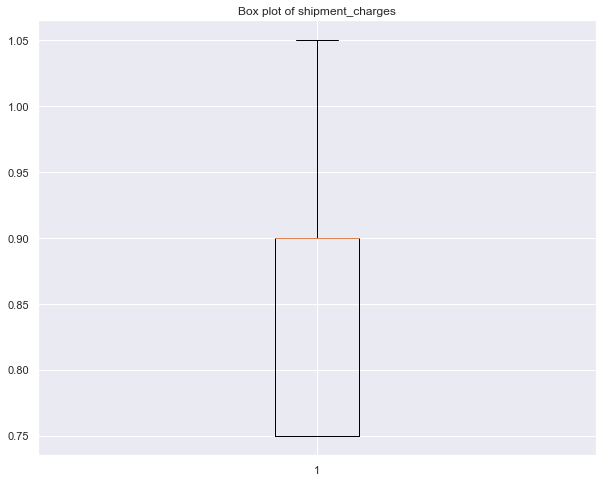

In [226]:
#Plotting box plot to check for outliers in "shipment_charges"
plt.boxplot(pre_processed_data['shipment_charges'])
plt.title('Box plot of shipment_charges')
plt.show()

There are no outliers in _"shipment_charges"_.

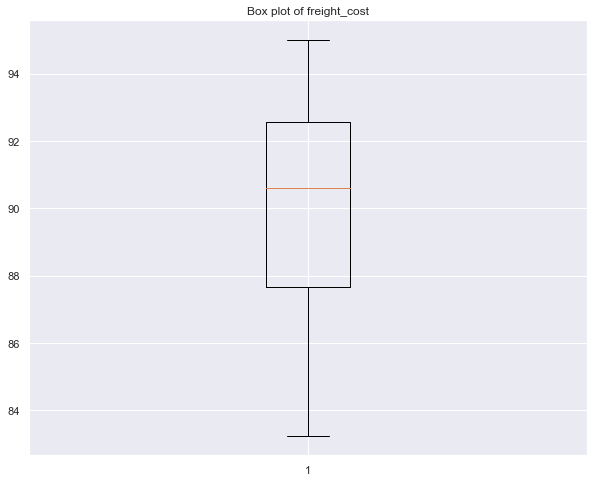

In [227]:
#Plotting box plot to check for outliers in "freight_cost"
plt.boxplot(pre_processed_data['freight_cost'])
plt.title('Box plot of freight_cost')
plt.show()

There are no outliers in _"freight_cost"_.

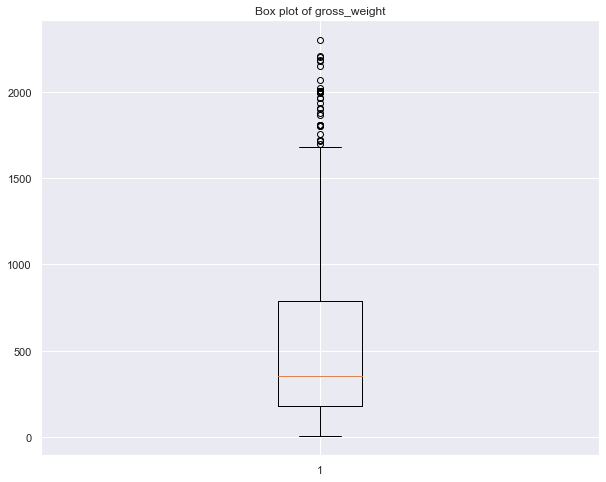

In [228]:
#Plotting box plot to check for outliers in "gross_weight"
plt.boxplot(feature_reduced_data['gross_weight'])
plt.title('Box plot of gross_weight')
plt.show()

There are some outliers in _"gross_weight"_ so we have to remove it.

In [229]:
pre_processed_data = remove_outlier(pre_processed_data, 'gross_weight')

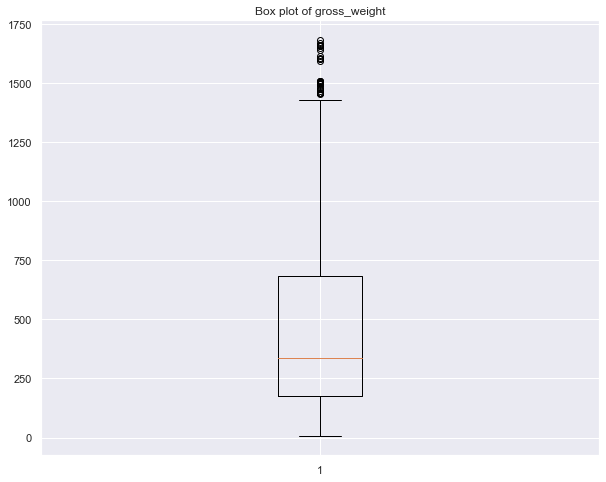

In [230]:
#Plotting box plot of "freight_cost" again
plt.boxplot(feature_reduced_data['gross_weight'])
plt.title('Box plot of gross_weight')
plt.show()

The outliers in _"gross_weight"_ are removed.

In [231]:
# saving for future use
outlier_removed_data = pre_processed_data

###  2.4 Encoding

The categorical features in the dataset are:

In [232]:
pre_processed_data.select_dtypes(exclude=["number"]).head(5)

,shipment_mode,shipping_company
0,Air,SC3
1,Ocean,SC1
2,Air,SC3
3,Air,SC2
5,Air,SC3


Now, we can encode the categorical features in the dataset as follows:

In [233]:
pre_processed_data = pd.get_dummies(pre_processed_data, drop_first=True)
pre_processed_data.head(5)

,freight_cost,gross_weight,shipment_charges,shipping_time,shipment_mode_Ocean,shipping_company_SC2,shipping_company_SC3
0,88.61,355.0,0.75,5.00741,0,0,1
1,85.65,105.0,0.90,21.41215,1,0,0
2,86.22,100.0,0.75,5.33692,0,0,1
3,94.43,1071.0,1.05,5.14792,0,1,0
5,87.84,228.7,0.75,5.18611,0,0,1


In [234]:
# saving for future use
encoded_data = pre_processed_data

### 2.5 Standardization / Normalization

Now, let us perform Standard scaling on the pre-processed dataset:

In [235]:
# separating independent variables and dependent variable
X = pre_processed_data.drop(['shipping_time'], axis=1)
y = pre_processed_data['shipping_time']

##### Standard Scaling

In [236]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
X_standard_scaled = pd.DataFrame(standardisation.fit_transform(X))
X_standard_scaled.head(5)

,0,1,2,3,4,5
0,-0.522478,-0.319038,-1.067801,-0.749089,-0.559778,1.219730
1,-1.560563,-0.946239,0.208529,1.334956,-0.559778,-0.819853
2,-1.360661,-0.958783,-1.067801,-0.749089,-0.559778,1.219730
3,1.518621,1.477264,1.484859,-0.749089,1.786422,-0.819853
4,-0.792520,-0.635900,-1.067801,-0.749089,-0.559778,1.219730


##### Min-Max Scaling

In [237]:
min_max = preprocessing.MinMaxScaler(feature_range =(0,1))
X_min_max_scaled = pd.DataFrame(min_max.fit_transform(X))
X_min_max_scaled.head(5)

,0,1,2,3,4,5
0,0.456559,0.207175,0.0,0.0,0.0,1.0
1,0.204429,0.057698,0.5,1.0,0.0,0.0
2,0.252981,0.054709,0.0,0.0,0.0,1.0
3,0.952300,0.635277,1.0,0.0,1.0,0.0
4,0.390971,0.131659,0.0,0.0,0.0,1.0


## 3. Exploratory Data Analysis

### 3.1 Univariate Analysis

#### A. Frequency Dustribution of Numerical features

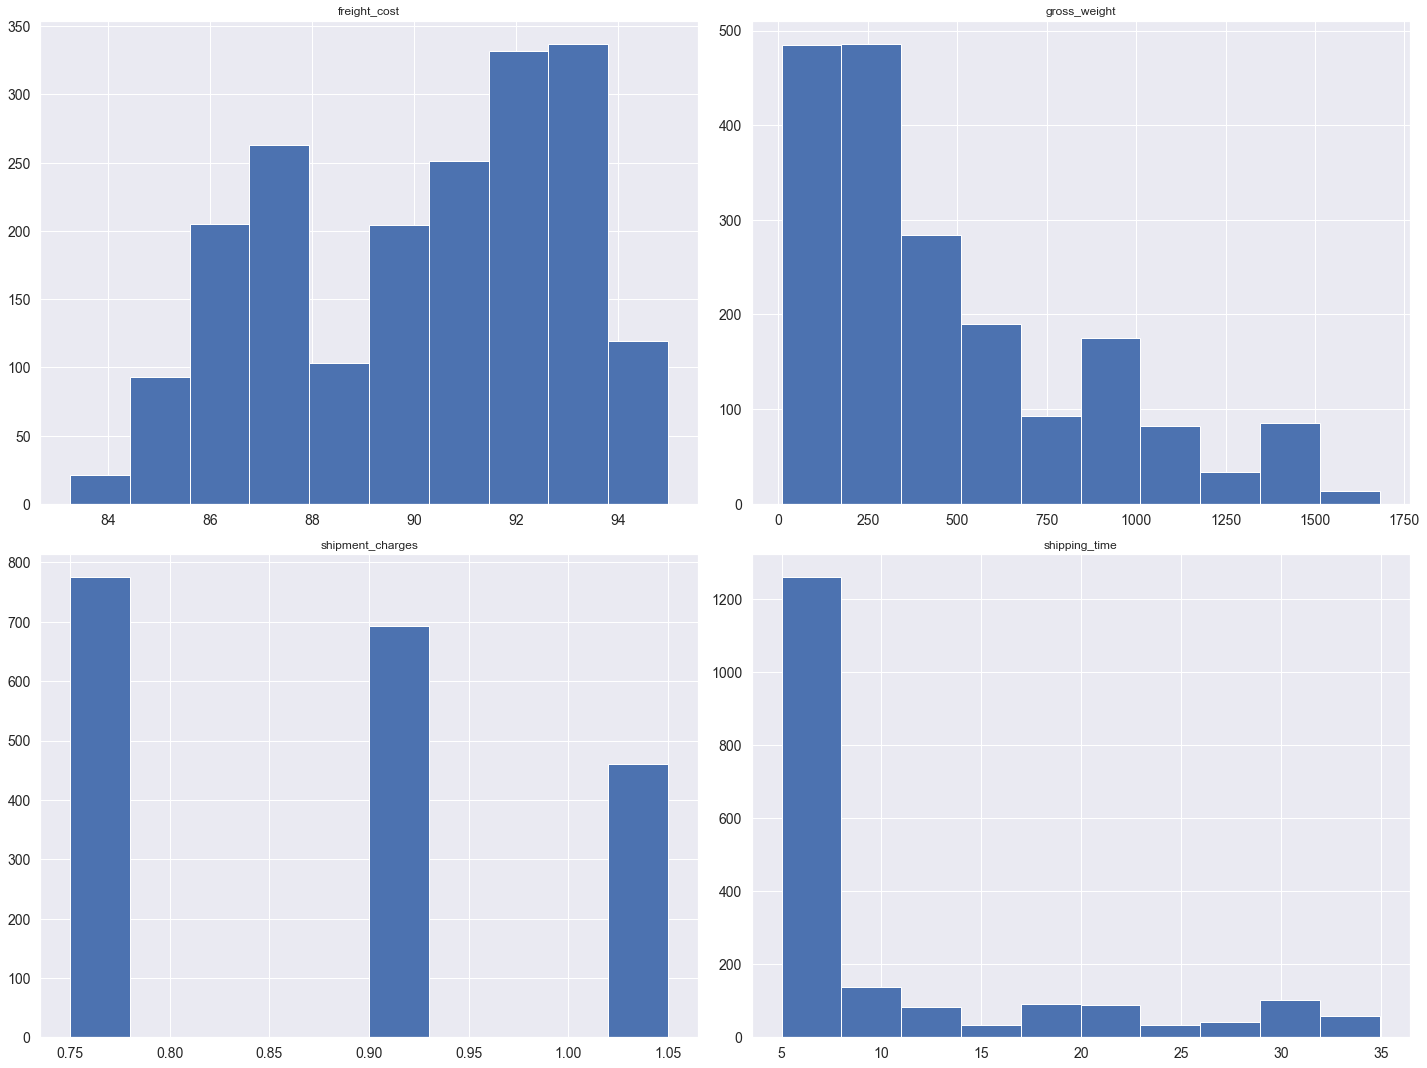

In [238]:
plt.Figure()
freq_graph = outlier_removed_data.select_dtypes(include=['int32', 'int64', 'float'])
graph = freq_graph.hist(figsize=(20, 15), xlabelsize=14, ylabelsize=14)
plt.tight_layout()
plt.show()

The features _"gross_weight"_ and _"shipping_time"_ are right skewed.

The feature _"shipment_charges"_ are fixed as either 0.75 or 0.90 or 1.05

#### B. Violin Plot of Freight_Cost

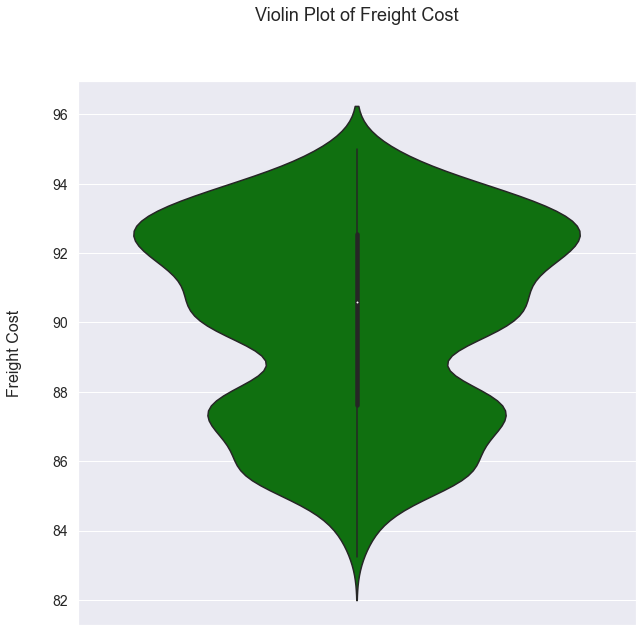

In [239]:
# sns.set(rc = {'figure.figsize':(10,8)})
plt.figure(figsize=(10, 10))
plot = sns.violinplot(data=outlier_removed_data, y='freight_cost', color='green')
plt.title('Violin Plot of Freight Cost', fontsize=18, y=1.1)
plt.ylabel('Freight Cost', fontsize=16, labelpad=30)
plt.yticks(fontsize=14)
plt.show()

#### C. Violin Plot of Gross Weight

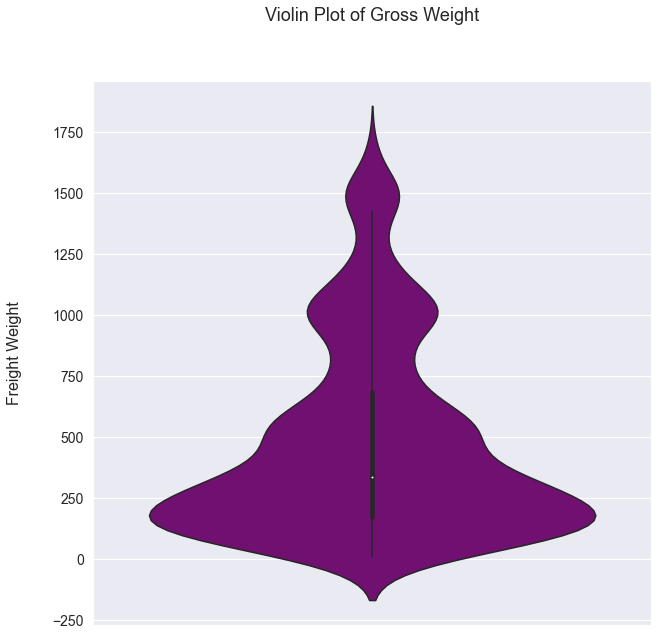

In [240]:
# sns.set(rc = {'figure.figsize':(10,8)})
plt.figure(figsize=(10, 10))
plot = sns.violinplot(data=outlier_removed_data, y='gross_weight', color='purple')
plt.title('Violin Plot of Gross Weight', fontsize=18, y=1.1)
plt.ylabel('Freight Weight', fontsize=16, labelpad=30)
plt.yticks(fontsize=14)
plt.show()

### 3.2 Bivariate Analysis

#### A. Count Plot of Shipment Modes

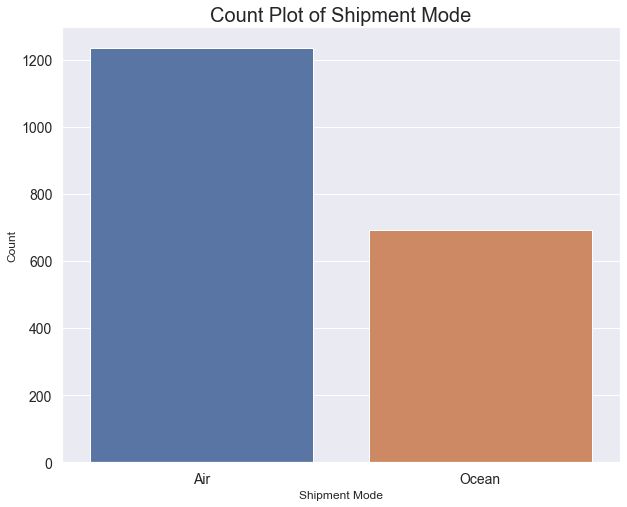

In [241]:
# count plot of shipment mode
plt.figure(figsize=(10,8))
plt.title('Count Plot of Shipment Mode', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plot = sns.countplot(x="shipment_mode", data=outlier_removed_data)
plot.set_xlabel('Shipment Mode')
plot.set_ylabel('Count')
plt.show()

#### B. Scatter Plot of Shipment Charges and Gross Weight based on Shipping Company

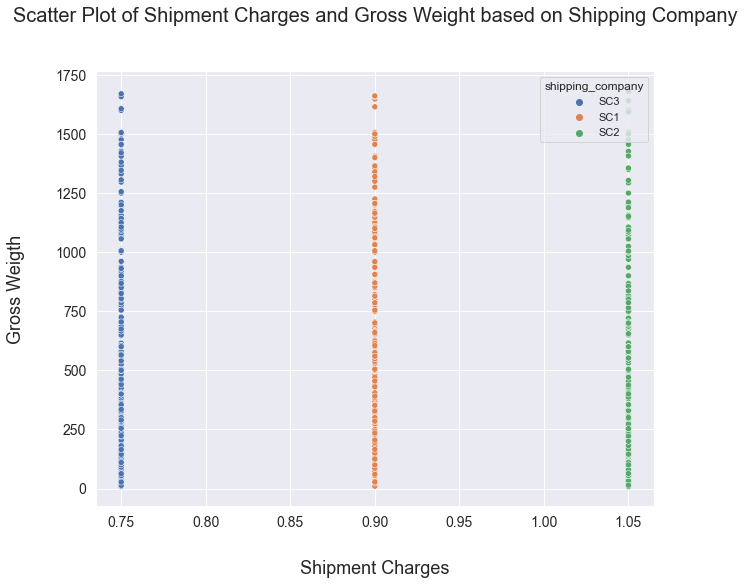

In [242]:
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='shipment_charges', y='gross_weight', data=outlier_removed_data, hue='shipping_company')
plt.title("Scatter Plot of Shipment Charges and Gross Weight based on Shipping Company", fontsize=20, y=1.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Shipment Charges', fontsize=18, labelpad=30)
plt.ylabel('Gross Weigth', fontsize=18, labelpad=30)
plt.show()

The Shipment companies **"SC1"**, **"SC2"** and **"SC3"** has fixed shipment charge irrespective of the _Gross Weight_.

#### C. Pair Plot of Dataset Features


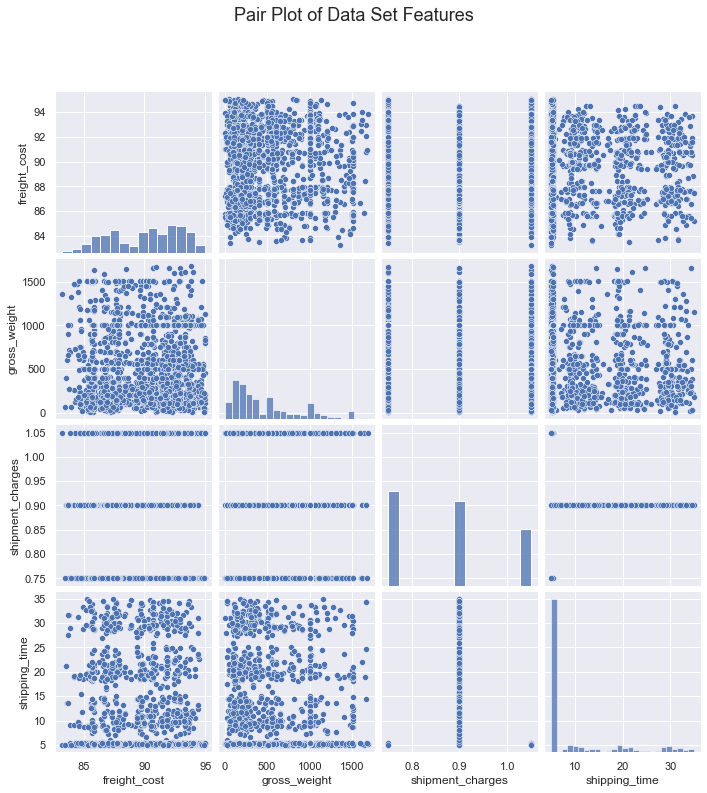

In [243]:
plot = sns.pairplot(outlier_removed_data)
plot.fig.suptitle('Pair Plot of Data Set Features', y=1.1, fontsize=18)
plt.show()

## 4. Modelling

Since, our target feature _"shipping_time"_ is continuous we'll be choosing **Linear Regression** model.

First of all let us look into the correlation between the variables.

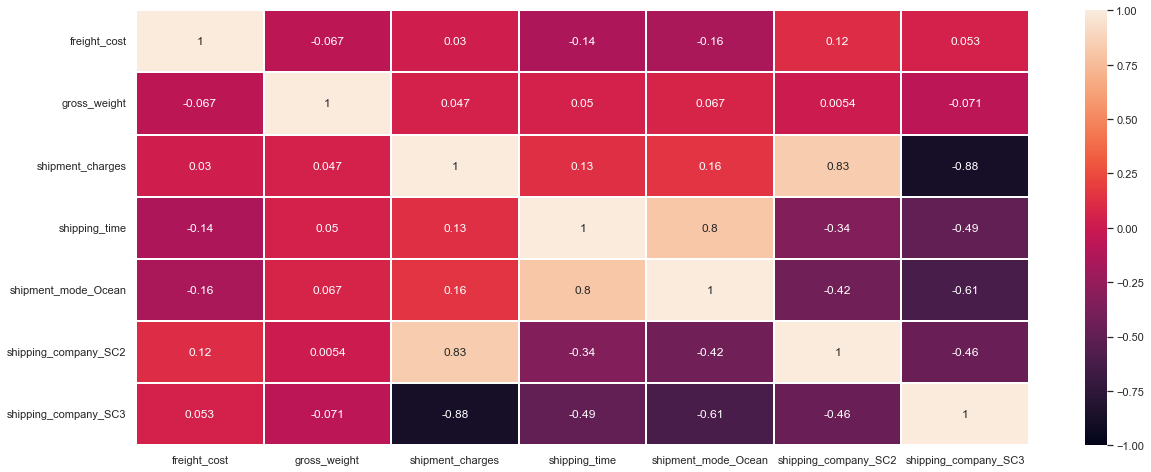

In [244]:
# plotting the correlation heatmap
corrmatrix = pre_processed_data.corr()
plt.subplots(figsize =(20, 8))
sns.heatmap(corrmatrix, annot=True, linewidth=0.2, vmin=-1, vmax=1)
plt.show()

The column _"shipment_charges"_ have high correlation with _"shipping_company_SC3"_, so, removing _"shipment_charges"_.

In [245]:
X.drop(['shipment_charges'], inplace=True, axis=1)

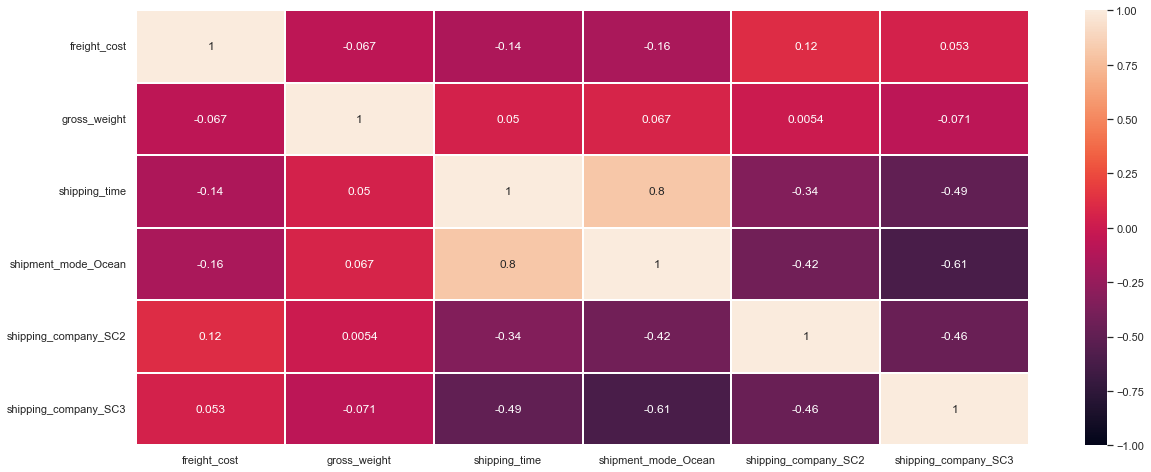

In [246]:
# plotting the correlation heatmap
corrmatrix = pre_processed_data.drop(['shipment_charges'], axis=1).corr()
plt.subplots(figsize =(20, 8))
sns.heatmap(corrmatrix, annot=True, linewidth=0.2, vmin=-1, vmax=1)
plt.show()

In [247]:
X.head(5)

,freight_cost,gross_weight,shipment_mode_Ocean,shipping_company_SC2,shipping_company_SC3
0,88.61,355.0,0,0,1
1,85.65,105.0,1,0,0
2,86.22,100.0,0,0,1
3,94.43,1071.0,0,1,0
5,87.84,228.7,0,0,1


###### Creating the Linear Regression Model

In [248]:
# splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2 ,random_state=42)

# creating the linear regression model
from sklearn.linear_model import LinearRegression
lr1 =LinearRegression()
lr1.fit(X_train,y_train)
y_pred = lr1.predict(X_test)
pd.DataFrame({'Actual Shipping time': y_test[:20], 'Predicted Shipping time': y_pred[:20]})

,Actual Shipping time,Predicted Shipping time
1162,5.15243,5.352050
1719,5.08032,4.972501
1936,33.38287,19.263215
979,5.07488,5.091638
342,20.47685,19.422365
490,5.14931,5.317573
1398,5.13866,5.153115
315,5.07569,4.894749
1233,5.04792,5.414808
502,19.17049,19.390106


In [249]:
# Calculating MSE and R2 Score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f'Mean Squared Error = {mean_squared_error(y_test,y_pred)}')
print(f'R2 score = {r2_score(y_test,y_pred)}')
print(f'Mean Absolute Error = {mean_absolute_error(y_test, y_pred)}')

Mean Squared Error = 27.68936698683849
R2 score = 0.6473083549236509
Mean Absolute Error = 2.8140335024034333


###### Creating Regression Model with Standard Scaled Data

In [250]:
# splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_standard_scaled,y, test_size =0.2 ,random_state=42)

# creating the linear regression model
from sklearn.linear_model import LinearRegression
lr2 =LinearRegression()
lr2.fit(X_train,y_train)
y_pred = lr2.predict(X_test)

pd.DataFrame({'Actual shipping time': y_test[:20], 'Predicted shipping time': y_pred[:20]})

,Actual shipping time,Predicted shipping time
1162,5.15243,5.364518
1719,5.08032,4.952409
1936,33.38287,19.276628
979,5.07488,5.106706
342,20.47685,19.434831
490,5.14931,5.296159
1398,5.13866,5.132096
315,5.07569,4.874284
1233,5.04792,5.391862
502,19.17049,19.403581


In [251]:
print(f'Mean Squared Error = {mean_squared_error(y_test,y_pred)}')
print(f'R2 score = {r2_score(y_test,y_pred)}')
print(f'Mean Absolute Error = {mean_absolute_error(y_test, y_pred)}')

Mean Squared Error = 27.68376321590821
R2 score = 0.6473797326185244
Mean Absolute Error = 2.8133151293697685


Standard scaling didn't brought any improvements to our model.

###### Creating Regression Model with Min-Max Scaled Data

In [252]:
# splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_min_max_scaled, y, test_size =0.2 ,random_state=42)

# creating the linear regression model
from sklearn.linear_model import LinearRegression
lr3 =LinearRegression()
lr3.fit(X_train,y_train)
y_pred = lr3.predict(X_test)
pd.DataFrame({'Actual shipping time': y_test[:20], 'Predicted shipping time': y_pred[:20]})

,Actual shipping time,Predicted shipping time
1162,5.15243,4.875000
1719,5.08032,4.562500
1936,33.38287,18.687500
979,5.07488,5.078125
342,20.47685,19.625000
490,5.14931,5.359375
1398,5.13866,5.437500
315,5.07569,4.562500
1233,5.04792,5.687500
502,19.17049,19.468750


In [253]:
# Calculating MSE and R2 Score
from sklearn.metrics import mean_squared_error,r2_score
print(f'Mean Squared Error = {mean_squared_error(y_test,y_pred)}')
print(f'R2 score = {r2_score(y_test,y_pred)}')
print(f'Mean Absolute Error = {mean_absolute_error(y_test, y_pred)}')

Mean Squared Error = 28.034300351888927
R2 score = 0.6429147869515414
Mean Absolute Error = 2.95906993523316


Min-Max scaling also didn't improved our model.

## 5. Model Fine Tuning

In [254]:
lr_tuned = LinearRegression()
lr_tuned.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [255]:
lr_tuned.set_params(fit_intercept=False)

LinearRegression(fit_intercept=False)

In [256]:
X_train,X_test,y_train,y_test = train_test_split(X_standard_scaled,y, test_size =0.2 ,random_state=42)
lr_tuned.fit(X_train,y_train)
y_pred = lr_tuned.predict(X_test)
pd.DataFrame({'Actual Shipping time': y_test[:20], 'Predicted Shipping time': y_pred[:20]})

,Actual Shipping time,Predicted Shipping time
1162,5.15243,6.00
1719,5.08032,7.00
1936,33.38287,20.50
979,5.07488,0.00
342,20.47685,13.75
490,5.14931,3.00
1398,5.13866,1.00
315,5.07569,6.00
1233,5.04792,1.00
502,19.17049,14.75


In [257]:
print(f'Mean Squared Error = {mean_squared_error(y_test,y_pred)}')
print(f'R2 score = {r2_score(y_test,y_pred)}')
print(f'Mean Absolute Error = {mean_absolute_error(y_test, y_pred)}')

Mean Squared Error = 45.58351654015802
R2 score = 0.4193827022280753
Mean Absolute Error = 5.280663989637305


Fine tuning also didn't improved the accuracy of our model.

## Conclusion

The best R2 score we got was 64%.

The best Mean Absolute Score we got was 2.81

The best Mean Squared Error we got was 27.6

From the actual and predicted shipping time we could observe that the shipping time was predicted wrongly, mostly for **"Ocean"** _"shipment_mode"_ feature.